In [1]:
filepath = './原书代码数据/chapter10/demo/data/original_data.xls'
f = open(filepath,'rb')
data = pd.read_excel(f)
f.close()
data.head()

,热水器编号,发生时间,开关机状态,加热中,保温中,有无水流,实际温度,热水量,水流量,节能模式,加热剩余时间,当前设置温度
0,R_00001,20141019063917,关,关,关,无,30°C,0%,0,关,0分钟,50°C
1,R_00001,20141019070154,关,关,关,无,30°C,0%,0,关,0分钟,50°C
2,R_00001,20141019070156,关,关,关,无,30°C,0%,8,关,0分钟,50°C
3,R_00001,20141019071230,关,关,关,无,30°C,0%,0,关,0分钟,50°C
4,R_00001,20141019071236,关,关,关,无,29°C,0%,0,关,0分钟,50°C


In [2]:
result = data[['发生时间','开关机状态','加热中','保温中','实际温度','热水量','水流量','加热剩余时间','当前设置温度']]

In [3]:
result1 = result[False == (result.开关机状态 == '关') & (result.水流量 == 0)]
result1[:5]

,发生时间,开关机状态,加热中,保温中,实际温度,热水量,水流量,加热剩余时间,当前设置温度
2,20141019070156,关,关,关,30°C,0%,8,0分钟,50°C
56,20141019073816,关,关,关,30°C,0%,8,0分钟,50°C
381,20141019094638,关,关,关,29°C,0%,16,0分钟,50°C
382,20141019094640,关,关,关,29°C,0%,13,0分钟,50°C
384,20141019094715,关,关,关,29°C,0%,20,0分钟,50°C


In [4]:
result1.发生时间 = pd.to_datetime(result1.发生时间,format='%Y%m%d%H%M%S')
result1[:5]

c:\python36\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,发生时间,开关机状态,加热中,保温中,实际温度,热水量,水流量,加热剩余时间,当前设置温度
2,2014-10-19 07:01:56,关,关,关,30°C,0%,8,0分钟,50°C
56,2014-10-19 07:38:16,关,关,关,30°C,0%,8,0分钟,50°C
381,2014-10-19 09:46:38,关,关,关,29°C,0%,16,0分钟,50°C
382,2014-10-19 09:46:40,关,关,关,29°C,0%,13,0分钟,50°C
384,2014-10-19 09:47:15,关,关,关,29°C,0%,20,0分钟,50°C


In [5]:
result2 = result1[result1.水流量 > 0]

In [6]:
result2['diff'] = result2.发生时间.diff()
result2[:5]

c:\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,发生时间,开关机状态,加热中,保温中,实际温度,热水量,水流量,加热剩余时间,当前设置温度,diff
2,2014-10-19 07:01:56,关,关,关,30°C,0%,8,0分钟,50°C,NaT
56,2014-10-19 07:38:16,关,关,关,30°C,0%,8,0分钟,50°C,00:36:20
381,2014-10-19 09:46:38,关,关,关,29°C,0%,16,0分钟,50°C,02:08:22
382,2014-10-19 09:46:40,关,关,关,29°C,0%,13,0分钟,50°C,00:00:02
384,2014-10-19 09:47:15,关,关,关,29°C,0%,20,0分钟,50°C,00:00:35


In [7]:
pd.Timedelta
timehold = pd.Timedelta(minutes = 4)
result2['id'] = (result2['diff'] > timehold).cumsum() + 1
result2[:5]

pandas._libs.tslibs.timedeltas.Timedelta

c:\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,发生时间,开关机状态,加热中,保温中,实际温度,热水量,水流量,加热剩余时间,当前设置温度,diff,id
2,2014-10-19 07:01:56,关,关,关,30°C,0%,8,0分钟,50°C,NaT,1
56,2014-10-19 07:38:16,关,关,关,30°C,0%,8,0分钟,50°C,00:36:20,2
381,2014-10-19 09:46:38,关,关,关,29°C,0%,16,0分钟,50°C,02:08:22,3
382,2014-10-19 09:46:40,关,关,关,29°C,0%,13,0分钟,50°C,00:00:02,3
384,2014-10-19 09:47:15,关,关,关,29°C,0%,20,0分钟,50°C,00:00:35,3


,事件数
1.00,232.0
1.25,227.0
1.50,218.0
1.75,207.0
2.00,201.0
2.25,197.0
2.50,194.0
2.75,191.0
3.00,186.0
3.25,181.0


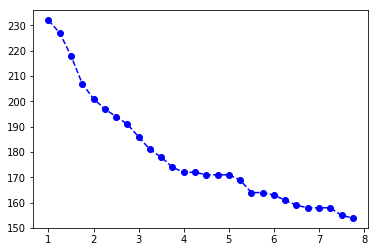

In [8]:
time_to_times = DataFrame(columns=['事件数'])
for i in range(1,8):
    for j in [0,0.25,0.5,0.75]:
        timehold = pd.Timedelta(minutes = i + j)
        id = (result2['diff'] > timehold).cumsum() + 1
        k = len(id.unique())
        time_to_times.loc[i+j,:] = k
time_to_times.dropna()   
plt.plot(time_to_times,'bo--')

In [9]:
time_to_times_1 = time_to_times.reset_index()
time_to_times_1.columns=['间隔','事件数']
time_to_times_1

,间隔,事件数
0,1.00,232.0
1,1.25,227.0
2,1.50,218.0
3,1.75,207.0
4,2.00,201.0
5,2.25,197.0
6,2.50,194.0
7,2.75,191.0
8,3.00,186.0
9,3.25,181.0


In [10]:
# time_to_times_1['y'] = time_to_times_1.事件数.diff()
# time_to_times_1['x'] = time_to_times_1.间隔.diff()
time_to_times_1['k'] = abs(time_to_times_1.事件数.diff()/time_to_times_1.间隔.diff())
time_to_times_1['k'] = time_to_times_1['k'].rolling(5,min_periods=1).mean()
time_to_times_1

,间隔,事件数,k
0,1.00,232.0,NaN
1,1.25,227.0,20.000000
2,1.50,218.0,28.000000
3,1.75,207.0,33.333333
4,2.00,201.0,31.000000
5,2.25,197.0,28.000000
6,2.50,194.0,26.400000
7,2.75,191.0,21.600000
8,3.00,186.0,16.800000
9,3.25,181.0,16.000000


# 书上代码

In [11]:
result2[:5]  #为书上data

,发生时间,开关机状态,加热中,保温中,实际温度,热水量,水流量,加热剩余时间,当前设置温度,diff,id
2,2014-10-19 07:01:56,关,关,关,30°C,0%,8,0分钟,50°C,NaT,1
56,2014-10-19 07:38:16,关,关,关,30°C,0%,8,0分钟,50°C,00:36:20,2
381,2014-10-19 09:46:38,关,关,关,29°C,0%,16,0分钟,50°C,02:08:22,3
382,2014-10-19 09:46:40,关,关,关,29°C,0%,13,0分钟,50°C,00:00:02,3
384,2014-10-19 09:47:15,关,关,关,29°C,0%,20,0分钟,50°C,00:00:35,3


In [12]:
def event_num(ts):
    d = result2.发生时间.diff() > ts
    return d.sum() + 1

In [13]:
dt = [pd.Timedelta(minutes=i) for i in np.arange(1,9,0.25)]
h = DataFrame(dt,columns=['阀值'])

In [14]:
h['事件数'] = h['阀值'].apply(event_num)

In [15]:
h['斜率'] = h.事件数.diff()/0.25
h['斜率指标'] = abs(h.斜率).rolling(4).mean()

In [16]:
ts = h['阀值'][h['斜率指标'].idxmin()-4]

In [17]:
ts

Timedelta('0 days 00:04:00')

# 神经网络

In [71]:
# %load ./原书代码数据/chapter10/demo/code/10-3_neural_network.py
#建立、训练多层神经网络，并完成模型的检验
from __future__ import print_function
import pandas as pd

inputfile1='./原书代码数据/chapter10/demo/data/train_neural_network_data.xls' #训练数据
inputfile2='./原书代码数据/chapter10/demo/data/test_neural_network_data.xls' #测试数据
testoutputfile = './原书代码数据/chapter10/demo/tmp/test_output_data.xls' #测试数据模型输出文件
data_train = pd.read_excel(inputfile1) #读入训练数据(由日志标记事件是否为洗浴)
data_test = pd.read_excel(inputfile2) #读入测试数据(由日志标记事件是否为洗浴)
y_train = data_train.iloc[:,4].values #训练样本标签列
x_train = data_train.iloc[:,5:17].values #训练样本特征
y_test = data_test.iloc[:,4].values #测试样本标签列
x_test = data_test.iloc[:,5:17].values #测试样本特征

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation

model = Sequential() #建立模型
model.add(Dense(input_dim=11, output_dim=17)) #添加输入层、隐藏层的连接
model.add(Activation('relu')) #以Relu函数为激活函数
model.add(Dense(input_dim=17, output_dim=10)) #添加隐藏层、隐藏层的连接
model.add(Activation('relu')) #以Relu函数为激活函数
model.add(Dense(input_dim=10, output_dim=1)) #添加隐藏层、输出层的连接
model.add(Activation('sigmoid')) #以sigmoid函数为激活函数
#编译模型，损失函数为binary_crossentropy，用adam法求解
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

model.fit(x_train, y_train, epochs = 100, batch_size = 1,verbose=0) #训练模型  epochs = 100 训练100次,verbose=0 不显示进度
model.save_weights('./原书代码数据/chapter10/demo/tmp/net.model') #保存模型参数

model.evaluate(x_test,y_test)
model.metrics_names

r = pd.DataFrame(model.predict_classes(x_test), columns = [u'预测结果'])
pd.concat([data_test.iloc[:,:5], r], axis = 1)
model.predict(x_test)


c:\python36\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=11, units=17)`
c:\python36\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=17, units=10)`
c:\python36\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=10, units=1)`


21/21 [==============================] - 1s 32ms/step


[4.95452356338501, 0.6190476417541504]

['loss', 'acc']

,热水事件,起始数据编号,终止数据编号,开始时间（begin_time）,根据日志判断是否为洗浴（1表示是，0表示否）,预测结果
0,1,73,336,2015-01-05 9:42:41',1,1
1,2,420,535,'2015-01-05 18:05:28',1,0
2,3,538,706,'2015-01-05 18:25:24',1,1
3,4,793,910,'2015-01-05 20:00:42',1,1
4,5,935,1133,'2015-01-05 20:15:13',1,1
5,6,1172,1274,'2015-01-05 20:42:41',1,1
6,7,1641,1770,'2015-01-06 08:08:26',0,0
7,8,2105,2280,2015-01-06 11:31:13',1,0
8,9,2290,2506,'2015-01-06 17:08:35',1,1
9,10,2562,2708,'2015-01-06 17:43:48',1,0


array([[8.7617260e-01],
       [1.5361852e-15],
       [9.9999774e-01],
       [9.4384229e-01],
       [7.8243941e-01],
       [9.0314990e-01],
       [4.2707947e-05],
       [0.0000000e+00],
       [9.7797751e-01],
       [0.0000000e+00],
       [3.8064428e-18],
       [9.6824104e-01],
       [9.3958992e-01],
       [1.6864351e-31],
       [9.5586681e-01],
       [9.7137660e-01],
       [9.5096231e-01],
       [0.0000000e+00],
       [7.4089607e-36],
       [9.3324065e-01],
       [8.9889079e-01]], dtype=float32)